In [381]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path
# Read the CSV file
df = pd.read_csv(
    '/Users/sean/OneDrive - connect.hku.hk/ECOM7126/Assignment/CustomerDataset.csv')

# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "assignment3_new"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [382]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)
# 画图用
data_for_plot = df.values




/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

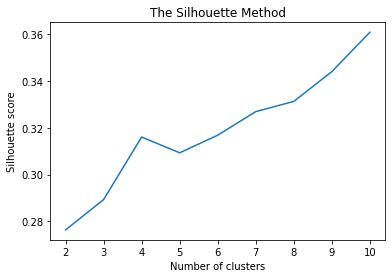

<Figure size 432x288 with 0 Axes>

In [383]:
# using silhouette score to find the optimal number of clusters
# X_1是删除了CustomerID，并且进行了预处理的数据
X_1 = preprocessing.fit_transform(df.drop(['CustomerID'], axis=1))
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_1)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_1, label, metric='euclidean')
    silhouette_scores.append(sil_coeff)
plt.plot(range(2, 11), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()
save_fig("silhouette_method_plot_1")


/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

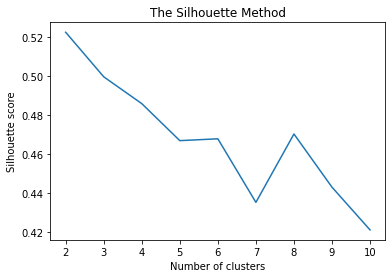

<Figure size 432x288 with 0 Axes>

In [384]:
# using silhouette score to find the optimal number of clusters
# X_2是删除了CustomerID，但是没有进行预处理的数据
from sklearn.metrics import silhouette_score
X_2 = df.drop(['CustomerID'], axis=1)
X_2['Gender'] = X_2['Gender'].map({'Male': 0,'Female': 1})
silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_2)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_2, label, metric='euclidean')
    silhouette_scores.append(sil_coeff)
plt.plot(range(2, 11), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()
save_fig("silhouette_method_plot_2")


/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

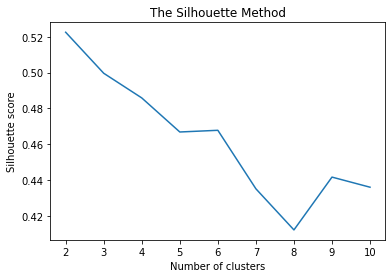

<Figure size 432x288 with 0 Axes>

In [385]:
# remove gender from the dataset
# using silhouette score to find the optimal number of clusters
# X_3是删除了CustomerID，Gender，并且没有进行预处理的数据
X_3 =  df.drop(['CustomerID','Gender'], axis=1)
silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_3)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_3, label, metric='euclidean')
    silhouette_scores.append(sil_coeff)
plt.plot(range(2, 11), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()
save_fig("silhouette_method_plot_3")

/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

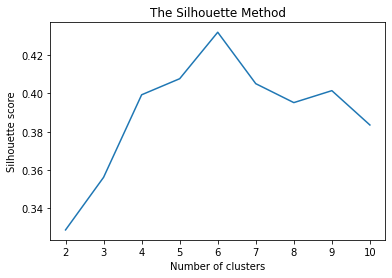

<Figure size 432x288 with 0 Axes>

In [386]:
# remove gender from the dataset
# using silhouette score to find the optimal number of clusters
# X_4是删除了CustomerID，Gender，并且进行了预处理的数据
X_4 = preprocessing.fit_transform(df.drop(['CustomerID','Gender'], axis=1))
silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_4)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_4, label, metric='euclidean')
    silhouette_scores.append(sil_coeff)
plt.plot(range(2, 11), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()
save_fig("silhouette_method_plot_4")

/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


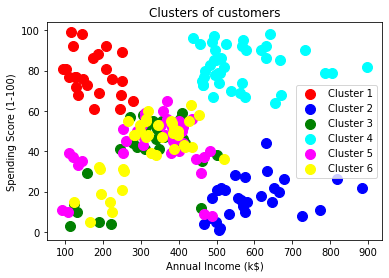

<Figure size 432x288 with 0 Axes>

In [387]:
# visualising the clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_1)
plt.scatter(data_for_plot[y_kmeans == 0, 3], data_for_plot[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_for_plot[y_kmeans == 1, 3], data_for_plot[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_for_plot[y_kmeans == 2, 3], data_for_plot[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_for_plot[y_kmeans == 3, 3], data_for_plot[y_kmeans == 3, 4], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_for_plot[y_kmeans == 4, 3], data_for_plot[y_kmeans == 4, 4], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(data_for_plot[y_kmeans == 5, 3], data_for_plot[y_kmeans == 5, 4], s = 100, c = 'yellow', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
save_fig("kmeans_plot_1")

/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


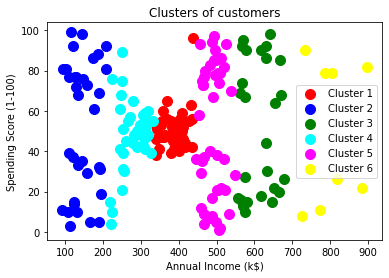

<Figure size 432x288 with 0 Axes>

In [388]:
# visualising the clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_2)
plt.scatter(data_for_plot[y_kmeans == 0, 3], data_for_plot[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_for_plot[y_kmeans == 1, 3], data_for_plot[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_for_plot[y_kmeans == 2, 3], data_for_plot[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_for_plot[y_kmeans == 3, 3], data_for_plot[y_kmeans == 3, 4], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_for_plot[y_kmeans == 4, 3], data_for_plot[y_kmeans == 4, 4], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(data_for_plot[y_kmeans == 5, 3], data_for_plot[y_kmeans == 5, 4], s = 100, c = 'yellow', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
save_fig("kmeans_plot_2")

/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


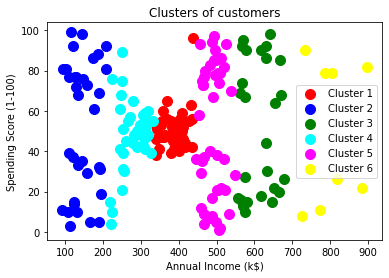

<Figure size 432x288 with 0 Axes>

In [389]:
# visualising the clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_3)
plt.scatter(data_for_plot[y_kmeans == 0, 3], data_for_plot[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_for_plot[y_kmeans == 1, 3], data_for_plot[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_for_plot[y_kmeans == 2, 3], data_for_plot[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_for_plot[y_kmeans == 3, 3], data_for_plot[y_kmeans == 3, 4], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_for_plot[y_kmeans == 4, 3], data_for_plot[y_kmeans == 4, 4], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(data_for_plot[y_kmeans == 5, 3], data_for_plot[y_kmeans == 5, 4], s = 100, c = 'yellow', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
save_fig("kmeans_plot_3")

/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


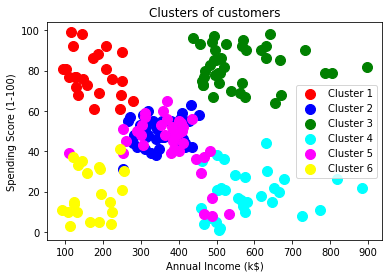

<Figure size 432x288 with 0 Axes>

In [390]:
# visualising the clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_4)
plt.scatter(data_for_plot[y_kmeans == 0, 3], data_for_plot[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_for_plot[y_kmeans == 1, 3], data_for_plot[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_for_plot[y_kmeans == 2, 3], data_for_plot[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_for_plot[y_kmeans == 3, 3], data_for_plot[y_kmeans == 3, 4], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_for_plot[y_kmeans == 4, 3], data_for_plot[y_kmeans == 4, 4], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(data_for_plot[y_kmeans == 5, 3], data_for_plot[y_kmeans == 5, 4], s = 100, c = 'yellow', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
save_fig("kmeans_plot_4")

/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

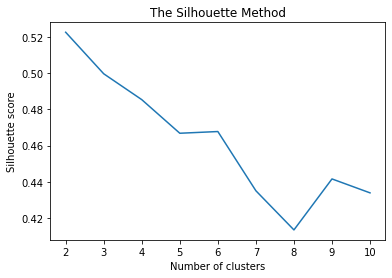

<Figure size 432x288 with 0 Axes>

In [391]:
#我们发现，可能是预处理的问题可能影响到聚类结果

num_pipeline_new = make_pipeline(
    SimpleImputer(strategy="median"))

cat_pipeline_new = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing_new = make_column_transformer(
    (num_pipeline_new, make_column_selector(dtype_include=np.number)),
    (cat_pipeline_new, make_column_selector(dtype_include=object)),
)

# X_5是删除了CustomerID，Gender，并且进行了新的预处理的数据
X_5 = preprocessing_new.fit_transform(df.drop(['CustomerID','Gender'], axis=1))

silhouette_scores = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X_5)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_5, label, metric='euclidean')
    silhouette_scores.append(sil_coeff)
plt.plot(range(2, 11), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()
save_fig("silhouette_method_plot_5")

/Users/sean/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


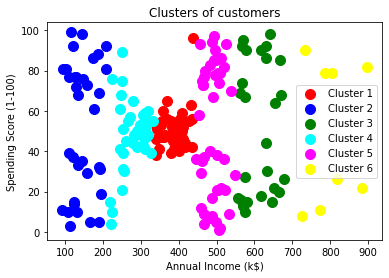

<Figure size 432x288 with 0 Axes>

In [392]:
# visualising the clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_5)
plt.scatter(data_for_plot[y_kmeans == 0, 3], data_for_plot[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_for_plot[y_kmeans == 1, 3], data_for_plot[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_for_plot[y_kmeans == 2, 3], data_for_plot[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_for_plot[y_kmeans == 3, 3], data_for_plot[y_kmeans == 3, 4], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_for_plot[y_kmeans == 4, 3], data_for_plot[y_kmeans == 4, 4], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(data_for_plot[y_kmeans == 5, 3], data_for_plot[y_kmeans == 5, 4], s = 100, c = 'yellow', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
save_fig("kmeans_plot_5")

# 预处理中的standardscaler影响了聚类的结果，我们可以尝试不使用standardscaler